# Linear Regression
The following are a set of methods intended for regression in which the
target value is expected to be a linear combination of the features. In
mathematical notation, if $\hat{y}$ is the predicted value.

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Across the module, we designate the vector $w = (w_1,
..., w_p)$ as `coef_` and $w_0$ as `intercept_`.


# Ordinary Least Squares 

`LinearRegression`{.interpreted-text role="class"} fits a linear model
with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of
squares between the observed targets in the dataset, and the targets
predicted by the linear approximation. Mathematically it solves a
problem of the form:

$$\min_{w} || X w - y||_2^2$$

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_0011.png)

`LinearRegression` will take in its
`fit` method arrays X, y and will store the coefficients $w$ of the
linear model in its `coef_` member:
```python
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
    reg.coef_
```
The coefficient estimates for Ordinary Least Squares rely on the
independence of the features. When features are correlated and the
columns of the design matrix $X$ have an approximate linear dependence,
the design matrix becomes close to singular and as a result, the
least-squares estimate becomes highly sensitive to random errors in the
observed target, producing a large variance. This situation of
*multicollinearity* can arise, for example, when data are collected
without an experimental design.


## Non-Negative Least Squares

It is possible to constrain all the coefficients to be non-negative,
which may be useful when they represent some physical or naturally
non-negative quantities (e.g., frequency counts or prices of goods).
`LinearRegression` accepts a boolean
`positive` parameter: when set to [True] [Non Negative Least
Squares](https://en.wikipedia.org/wiki/Non-negative_least_squares) are
then applied.



## Ordinary Least Squares Complexity

The least squares solution is computed using the singular value
decomposition of X. If X is a matrix of shape [(n_samples,
n_features)] this method has a cost of
$O(n_{\text{samples}} n_{\text{features}}^2)$, assuming that
$n_{\text{samples}} \geq n_{\text{features}}$.

# Model Persistance 

After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain. The following sections give you some hints on how to persist a scikit-learn model.

It is possible to save a model in scikit-learn by using Python’s built-in persistence model, namely pickle:

```python
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y= datasets.load_iris(return_X_y=True)
clf.fit(X, y)


import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

y[0]

```


## Visualizing cross-validation behavior in scikit-learn

Choosing the right cross-validation object is a crucial part of fitting a model properly. There are many ways to split data into training and test sets in order to avoid model overfitting, to standardize the number of groups in test sets, etc.

This example visualizes the behavior of several common scikit-learn objects for comparison.


```python

from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

```

## Visualize our data
First, we must understand the structure of our data. It has 100 randomly generated input datapoints, 3 classes split unevenly across datapoints, and 10 “groups” split evenly across datapoints.

As we’ll see, some cross-validation objects do specific things with labeled data, others behave differently with grouped data, and others do not use this information.

To begin, we’ll visualize our data.

```python

# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

```

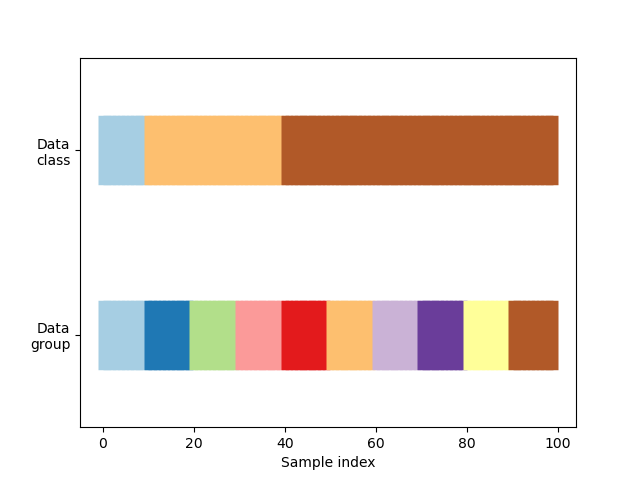

### Define a function to visualize cross-validation behavior

We’ll define a function that lets us visualize the behavior of each cross-validation object. We’ll perform 4 splits of the data. On each split, we’ll visualize the indices chosen for the training set (in blue) and the test set (in red).


```python
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

```

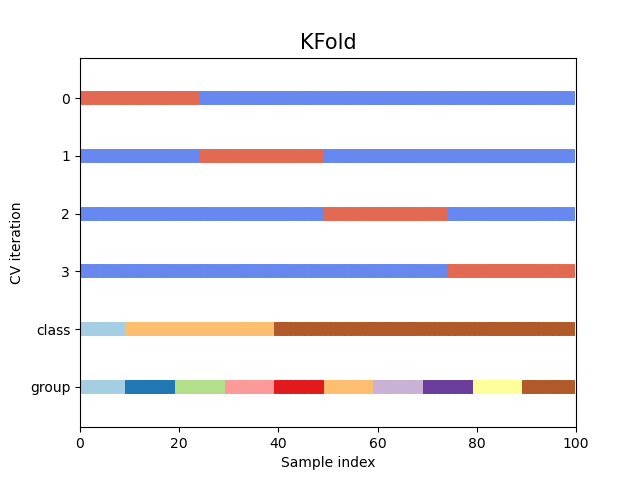

As you can see, by default the KFold cross-validation iterator does not take either datapoint class or group into consideration. We can change this by using the StratifiedKFold like so.


```python
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
```

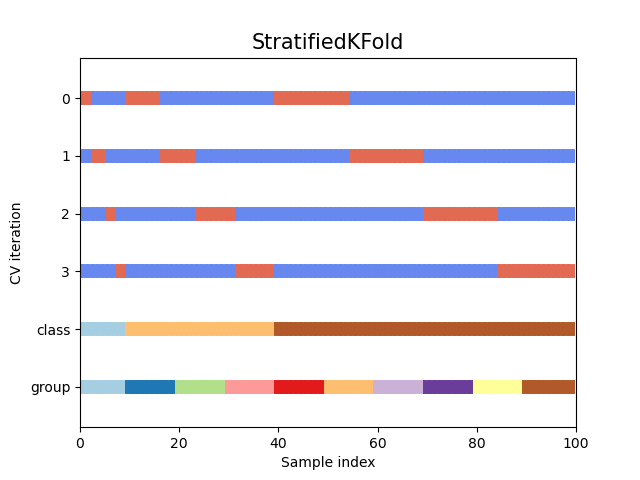

In this case, the cross-validation retained the same ratio of classes across each CV split. Next we’ll visualize this behavior for a number of CV iterators.

## Visualize cross-validation indices for many CV objects
Let’s visually compare the cross validation behavior for many scikit-learn cross-validation objects. Below we will loop through several common cross-validation objects, visualizing the behavior of each.

Note how some use the group/class information while others do not.

```python
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()
```

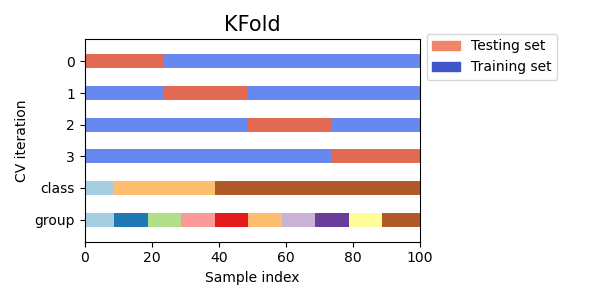
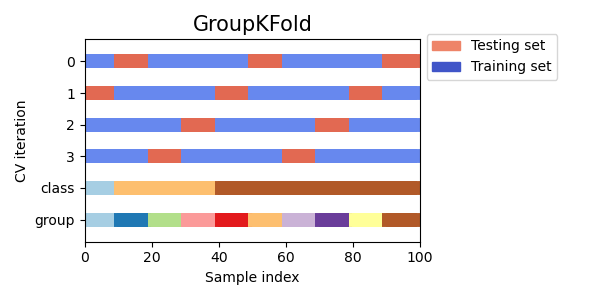
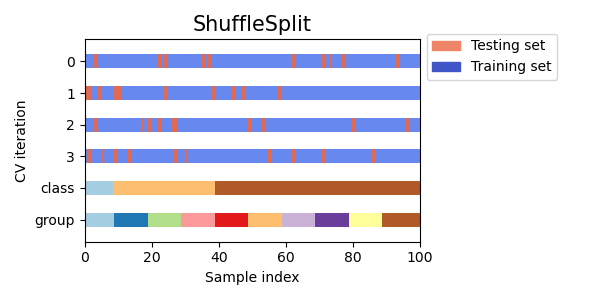
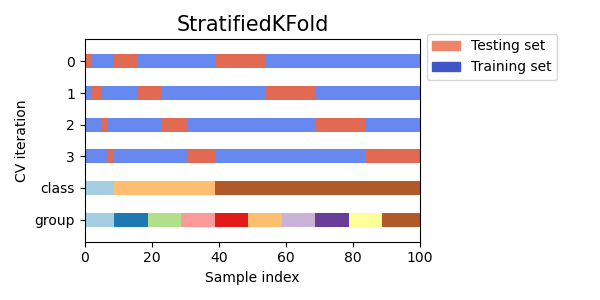
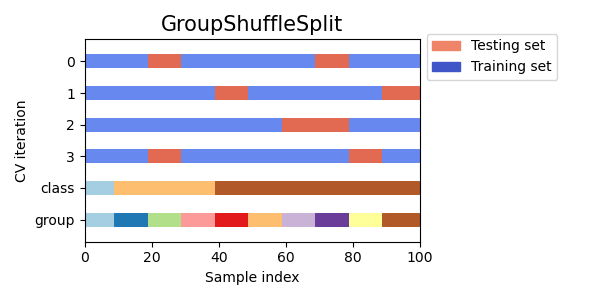
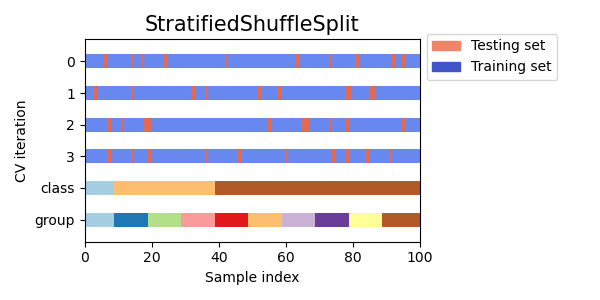
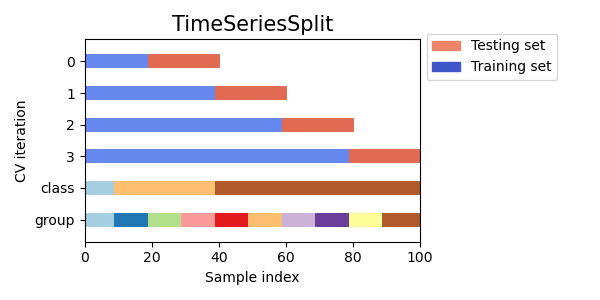

# Describe relationships and make predictions from time series data

Time series data are data collected on the same observational
unit at multiple time periods
* Aggregate consumption and GDP for a country (for example, 20 years of quarterly observations = 80 observations)
* Yen/USD, pound/USD and Euro/USD exchange rates (daily data for 1 year = 365 observations)
* Cigarette consumption per capita in a state, by year

Example #1 of time series data: US rate of price inflation, as
measured by the quarterly percentage change in the
Consumer Price Index (CPI), at an annual rate 

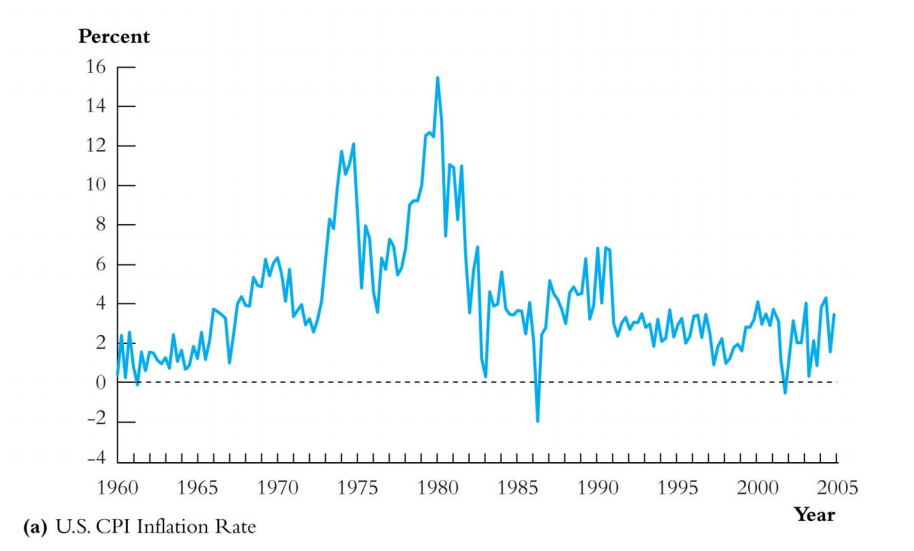


## Why use time series data?

* To develop forecasting models
    * What will the rate of inflation be next year?
* To estimate dynamic causal effects
    * If the Fed increases the Federal Funds rate now, what
will be the effect on the rates of inflation and
unemployment in 3 months? in 12 months?
oWhat is the effect over time on cigarette consumption
of a hike in the cigarette tax?
* Or, because that is your only option …
    * Rates of inflation and unemployment in the US can be
observed only over time! 


## Time series data raises new technical issues

* Time lags
* Correlation over time (serial correlation, a.k.a.autocorrelation)
* Forecasting models built on regression methods:
    * autoregressive (AR) models
    * autoregressive distributed lag (ADL) models
    * need not (typically do not) have a causal interpretation
* Conditions under which dynamic effects can be estimated, and how to estimate them
* Calculation of standard errors when the errors are serially correlated

## Introduction to Time Series Data and Serial Correlation 
First, some notation and terminology. 

**Notation for time series data**
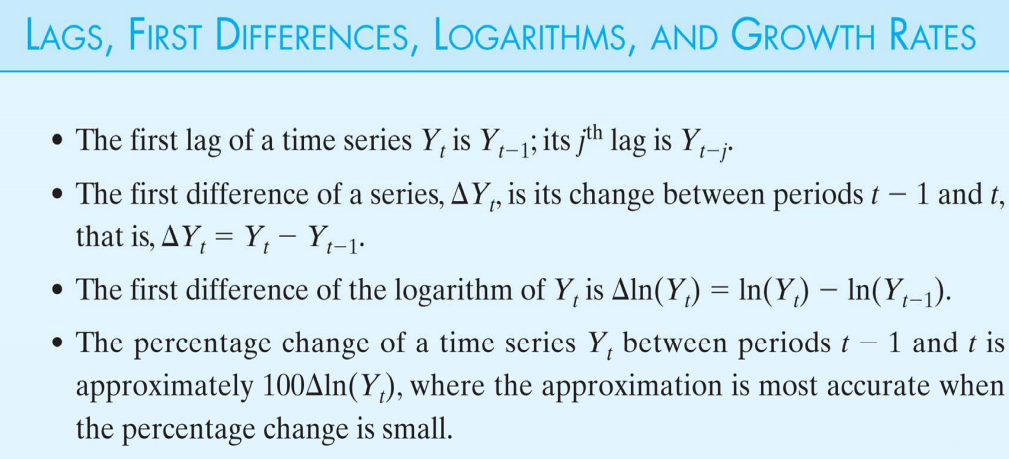

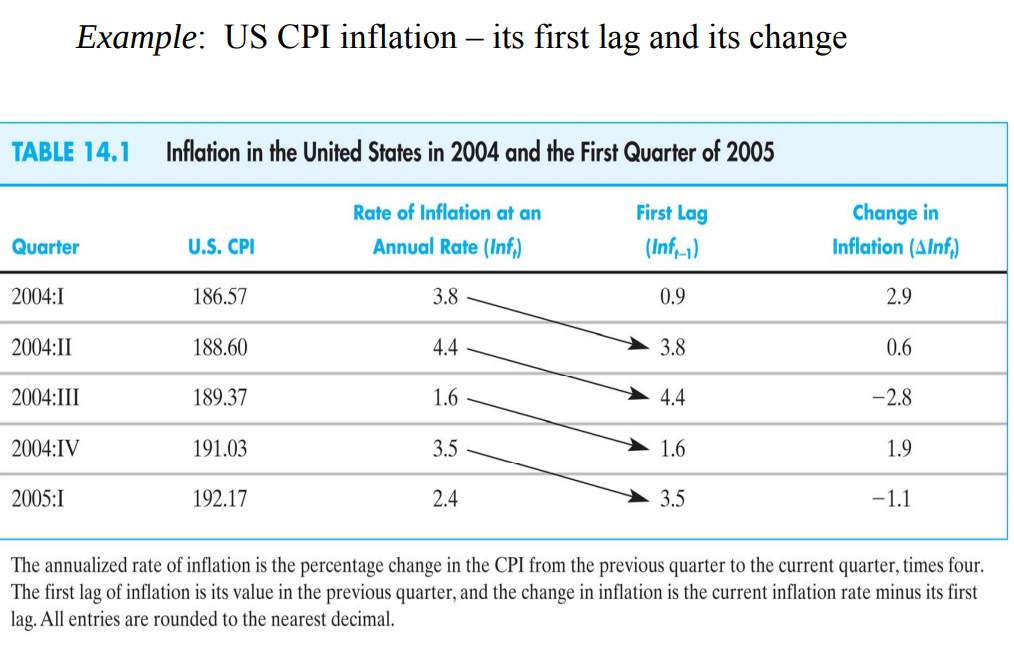

## Homework Items

1. Find a time series Kaggle Dataset, Download and Import it
2. Build a linear regression model that given the value for a current timestep $Y_t$ and features $X_t$ for that time step, predicts the next timestep $Y_{t+1}$
3. Visualize the performance of your model over time (prediction vs actual value) 
    * Extrapolate by using previous predicted values to predict future values 
    * Update / correct the value every n steps to see what effect this has on your error after n steps (snowballing effect)
4. Compare linear regression with other regression models of your choice.